#### CITS5508 Assignment 2
* _File          : assignment2.ipynb_
* _Contact       : 22056151@student.uwa.edu.au_
* _Author        : Suning (Juliet) Li_
<br><br>
* _Editor        : Visual Studio Code 1.77.0_
* _Python Version: 3.10_
* _Version       : 1.0_
<br><br>
* _License       : (C)Copyright Juliet_Li_2023_
* _Description   : This is the python notebook for CITS5508 assignment 2._
* _ModifyTime    : 21/04/2023_

# Section 1: Breast cancer wisconsin (diagnostic) dataset

### Part 1: Load and Prepare the data

In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()

# features space
arr_x = breast_cancer_data.data

# target values
arr_y = breast_cancer_data.target

# feature names
feature_names = breast_cancer_data.feature_names

# target names
target_names = breast_cancer_data.target_names

In [2]:
print('The shape of the feature space is', arr_x.shape)
print('The shape of the target space is', arr_y.shape)

The shape of the feature space is (569, 30)
The shape of the target space is (569,)


In [3]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Create dataframe that integrates feature and target space
df_feature = pd.DataFrame(arr_x, columns=feature_names)

# Generate correlation matrix for all features
correlation_matrix = df_feature[feature_names].corr()

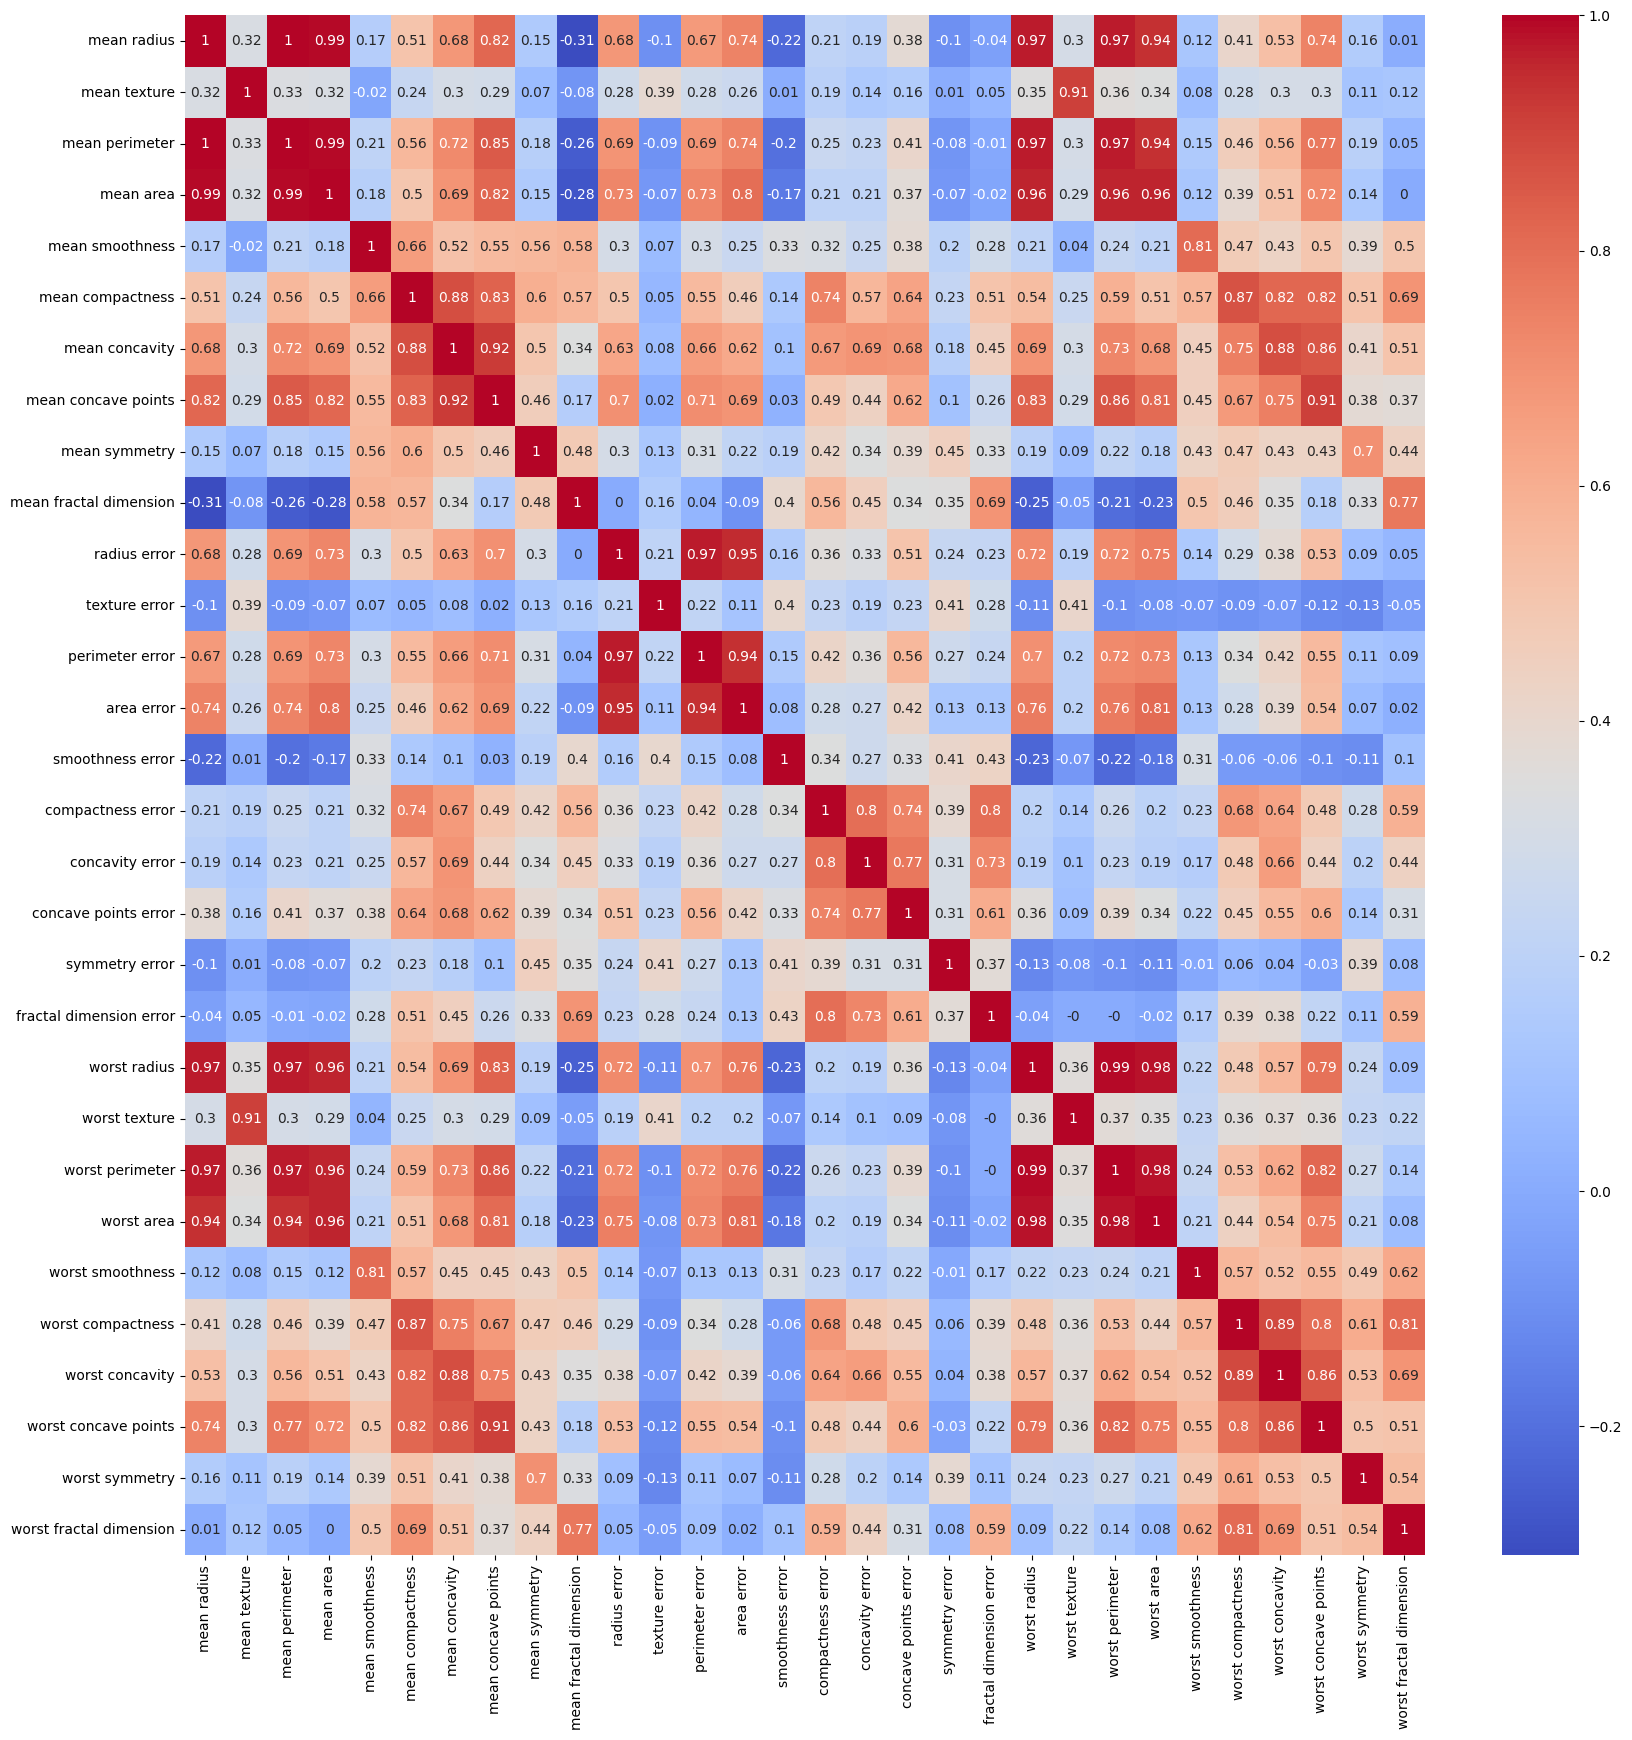

In [5]:
# Plot the correlation matrix for all features
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix.round(2), annot=True, cmap='coolwarm')
plt.show()

In [6]:
# Find features with correlation higher than 0.9 or lower than -0.9

# Define the correlation threshold
correlation_threshold = 0.9

# Create a set for the features to be dropped
features_to_drop = set()

# Loop through the correlation matrix and identify the features that are highly correlated and are to be dropped
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= correlation_threshold:
            colname = correlation_matrix.columns[i]
            
            features_to_drop.add(colname)
            # Print the highly correlated features 
            print(colname, ',', correlation_matrix.index[j], ':', correlation_matrix.iloc[i, j])

mean perimeter , mean radius : 0.9978552814938109
mean area , mean radius : 0.9873571700566127
mean area , mean perimeter : 0.9865068039913907
mean concave points , mean concavity : 0.9213910263788588
perimeter error , radius error : 0.9727936770160764
area error , radius error : 0.951830112110991
area error , perimeter error : 0.9376554069544157
worst radius , mean radius : 0.9695389726112055
worst radius , mean perimeter : 0.9694763634663146
worst radius , mean area : 0.9627460860470841
worst texture , mean texture : 0.912044588840421
worst perimeter , mean radius : 0.9651365139559871
worst perimeter , mean perimeter : 0.9703868870426394
worst perimeter , mean area : 0.9591195743552645
worst perimeter , worst radius : 0.993707916102949
worst area , mean radius : 0.9410824595860461
worst area , mean perimeter : 0.9415498080023068
worst area , mean area : 0.9592133256498998
worst area , worst radius : 0.9840145644590742
worst area , worst perimeter : 0.9775780914063871
worst concave po

In [7]:
# print the features that should be dropped as they are highly correlated with other features
print(features_to_drop)

# we will be dropping the below 10 features

{'worst perimeter', 'area error', 'mean perimeter', 'worst area', 'worst radius', 'mean area', 'perimeter error', 'worst concave points', 'mean concave points', 'worst texture'}


In [21]:
# Drop the features from the original dataframe
df_feature_dropped = df_feature.drop(features_to_drop, axis=1)

# Update the feature space
arr_x_drpped = df_feature_dropped.values

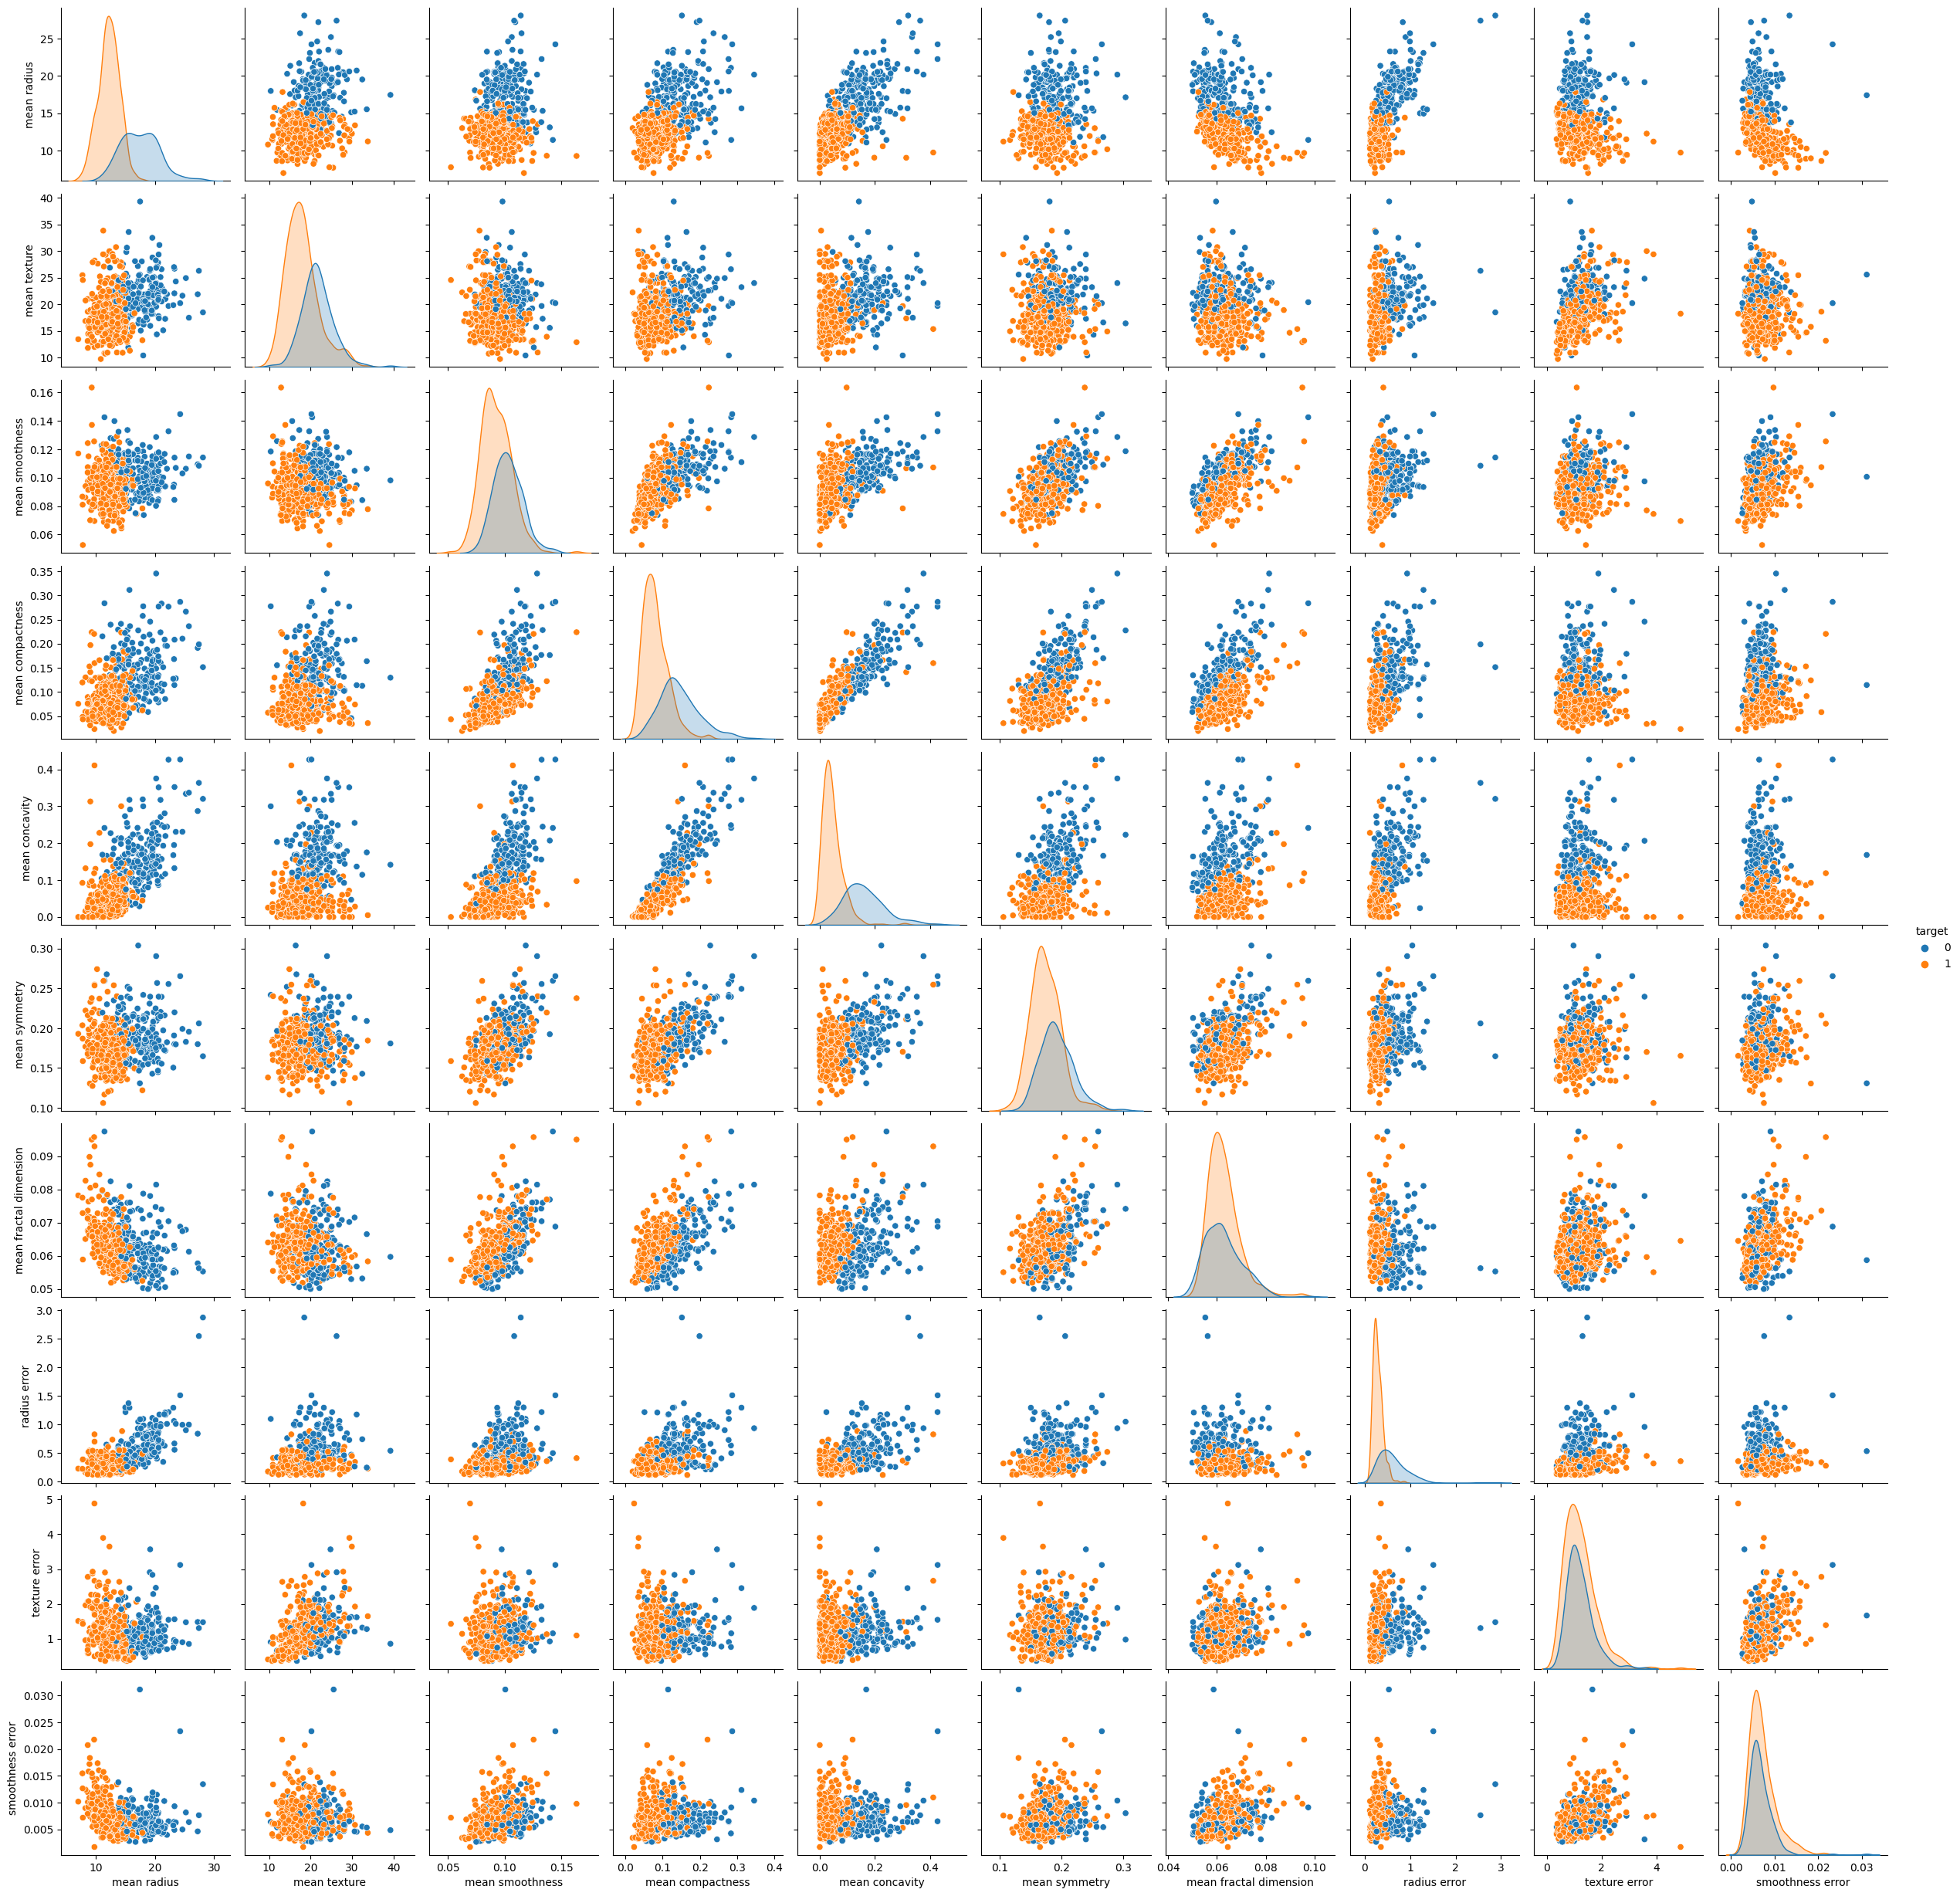

In [22]:
# select the first 10 features to plot, to see the separation of the feature space
li_selected = df_feature_dropped.columns[:10]
df_full = df_feature_dropped.copy()
df_full['target'] = arr_y

# Plot the relationship between features and target
# plt.figure(figsize=(20,20))
sns.pairplot(df_full, vars=li_selected, hue='target')
plt.show()

# As can be seen from below, the feature space is relatively separated.

In [24]:
# Split the data into training and test sets (85/15)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(arr_x_drpped, arr_y, test_size=0.15, random_state=123)

# As we are first training decision tree models, typicall decision tree does not require feature scaling. Feature scaling will not be performed here. 

In [47]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Train the decision tree classifier
dt_clf = DecisionTreeClassifier(random_state=123)
dt_clf.fit(X_train, y_train)

# Perform predictions on the training set and the test set
y_train_pred = dt_clf.predict(X_train)
y_test_pred = dt_clf.predict(X_test)

# Compare the accuracy scores for the two sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
tree_depth = dt_clf.get_depth()

print("Training set accuracy:", train_accuracy)
print("Test set accuracy:", test_accuracy)
print("The depth of the tree is:", tree_depth)

Training set accuracy: 1.0
Test set accuracy: 0.8953488372093024
The depth of the tree is: 7


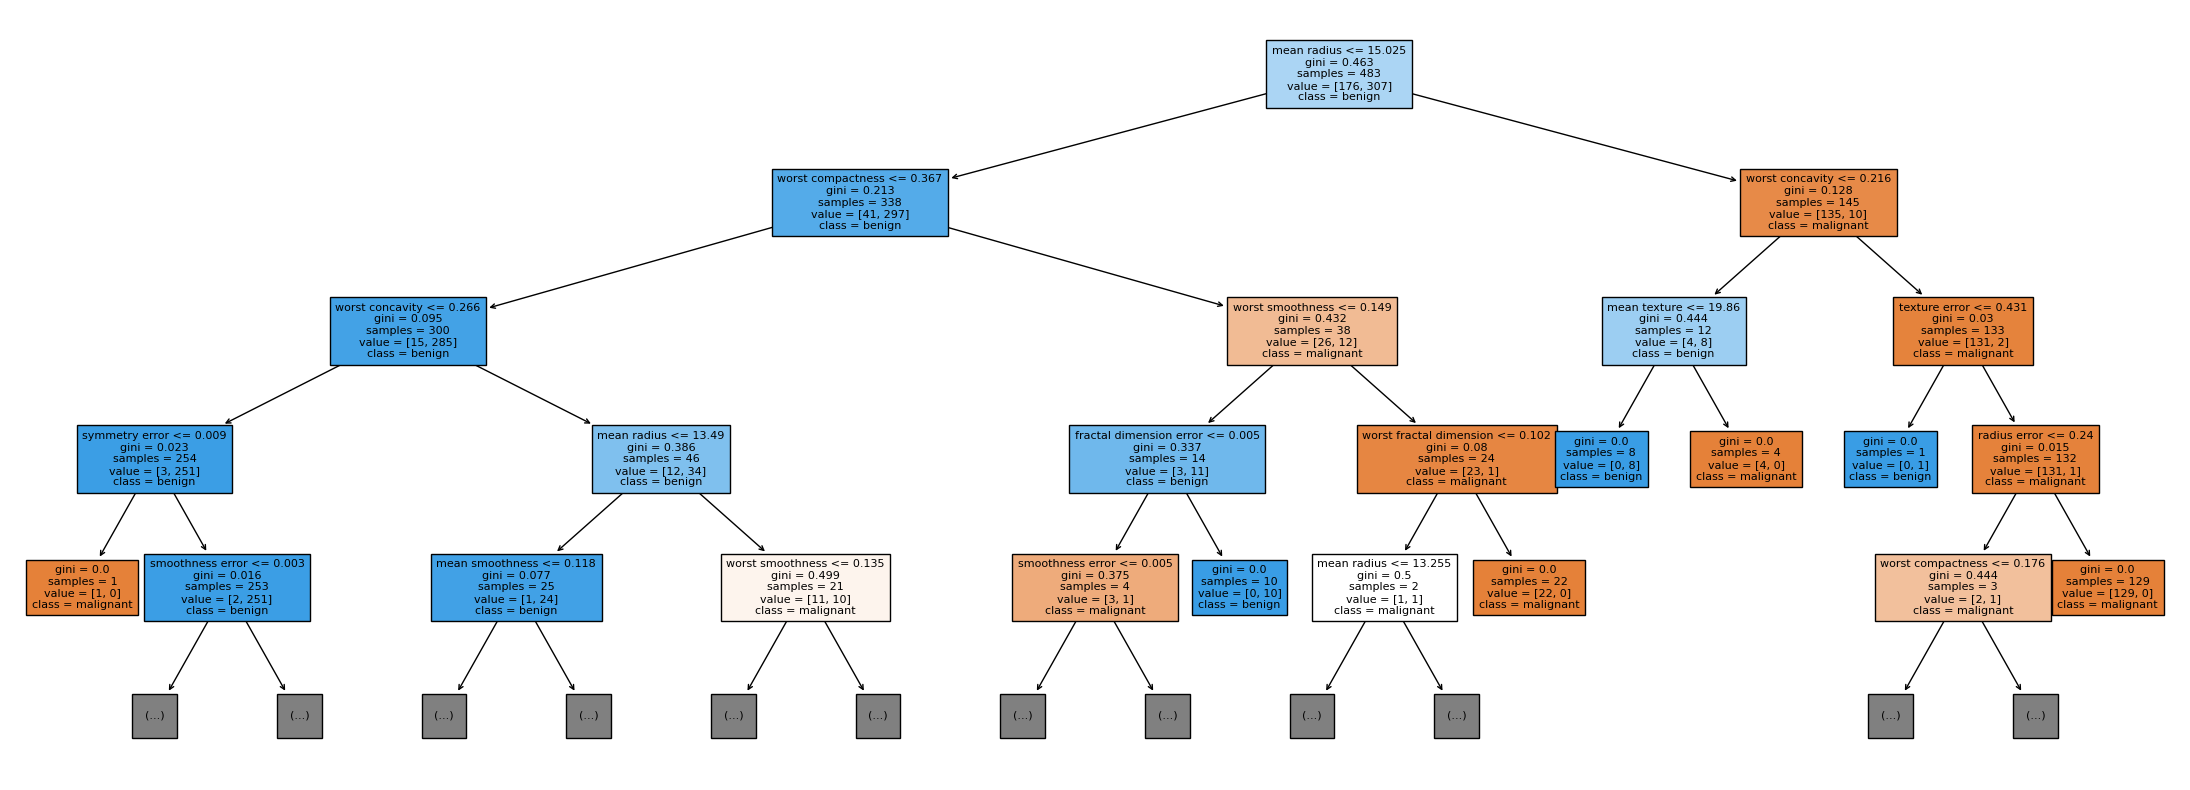

In [46]:
# Display the decision tree built from the training process (limited to max_depth=3)
plt.figure(figsize=(28, 10))
plot_tree(dt_clf, max_depth=4, filled=True, feature_names=df_feature_dropped.columns, class_names=target_names,fontsize=8)
plt.show()

In [48]:
# Train the decision tree classifier
dt_clf_depth3 = DecisionTreeClassifier(max_depth=3, random_state=123)
dt_clf_depth3.fit(X_train, y_train)

# Perform predictions on the training set and the test set
y_train_pred_depth3 = dt_clf_depth3.predict(X_train)
y_test_pred_depth3 = dt_clf_depth3.predict(X_test)

# Compare the accuracy scores for the two sets
train_accuracy_depth3 = accuracy_score(y_train, y_train_pred_depth3)
test_accuracy_depth3 = accuracy_score(y_test, y_test_pred_depth3)
tree_depth_depth3 = dt_clf_depth3.get_depth()

print("Training set accuracy:", train_accuracy_depth3)
print("Test set accuracy:", test_accuracy_depth3)
print("The depth of the tree is:", tree_depth_depth3)

Training set accuracy: 0.9585921325051759
Test set accuracy: 0.8837209302325582
The depth of the tree is: 3


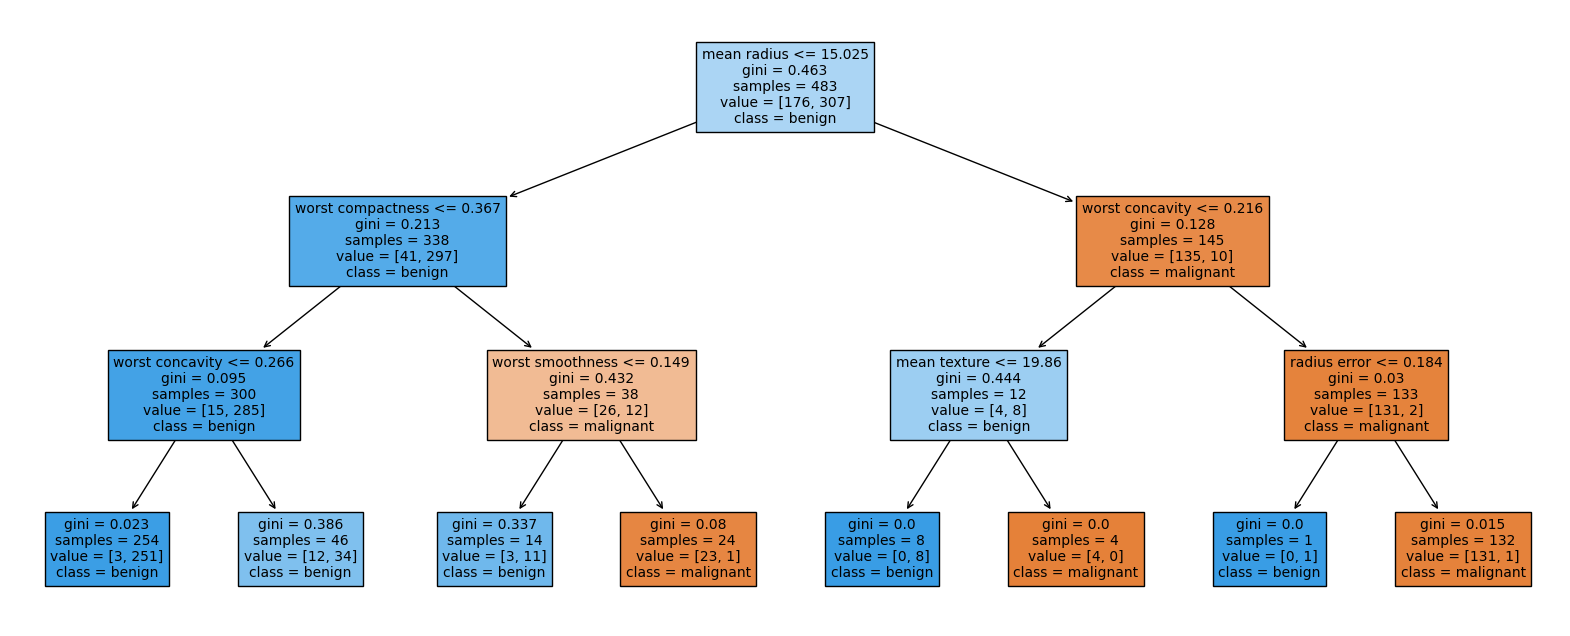

In [54]:
# Display the decision tree built from the training process (limited to max_depth=3)
plt.figure(figsize=(20, 8))
plot_tree(dt_clf_depth3, max_depth=3, filled=True, feature_names=df_feature_dropped.columns, class_names=target_names,fontsize=10)
plt.show()

In [55]:
# Train the decision tree classifier
dt_clf_sampleSplit5 = DecisionTreeClassifier(min_samples_split=5, random_state=123)
dt_clf_sampleSplit5.fit(X_train, y_train)

# Perform predictions on the training set and the test set
y_train_pred_sampleSplit5 = dt_clf_sampleSplit5.predict(X_train)
y_test_pred_sampleSplit5 = dt_clf_sampleSplit5.predict(X_test)

# Compare the accuracy scores for the two sets
train_accuracy_sampleSplit5 = accuracy_score(y_train, y_train_pred_sampleSplit5)
test_accuracy_sampleSplit5 = accuracy_score(y_test, y_test_pred_sampleSplit5)
tree_depth_sampleSplit5 = dt_clf_sampleSplit5.get_depth()

print("Training set accuracy:", train_accuracy_sampleSplit5)
print("Test set accuracy:", test_accuracy_sampleSplit5)
print("The depth of the tree is:", tree_depth_sampleSplit5)

Training set accuracy: 0.9917184265010351
Test set accuracy: 0.9069767441860465
The depth of the tree is: 7


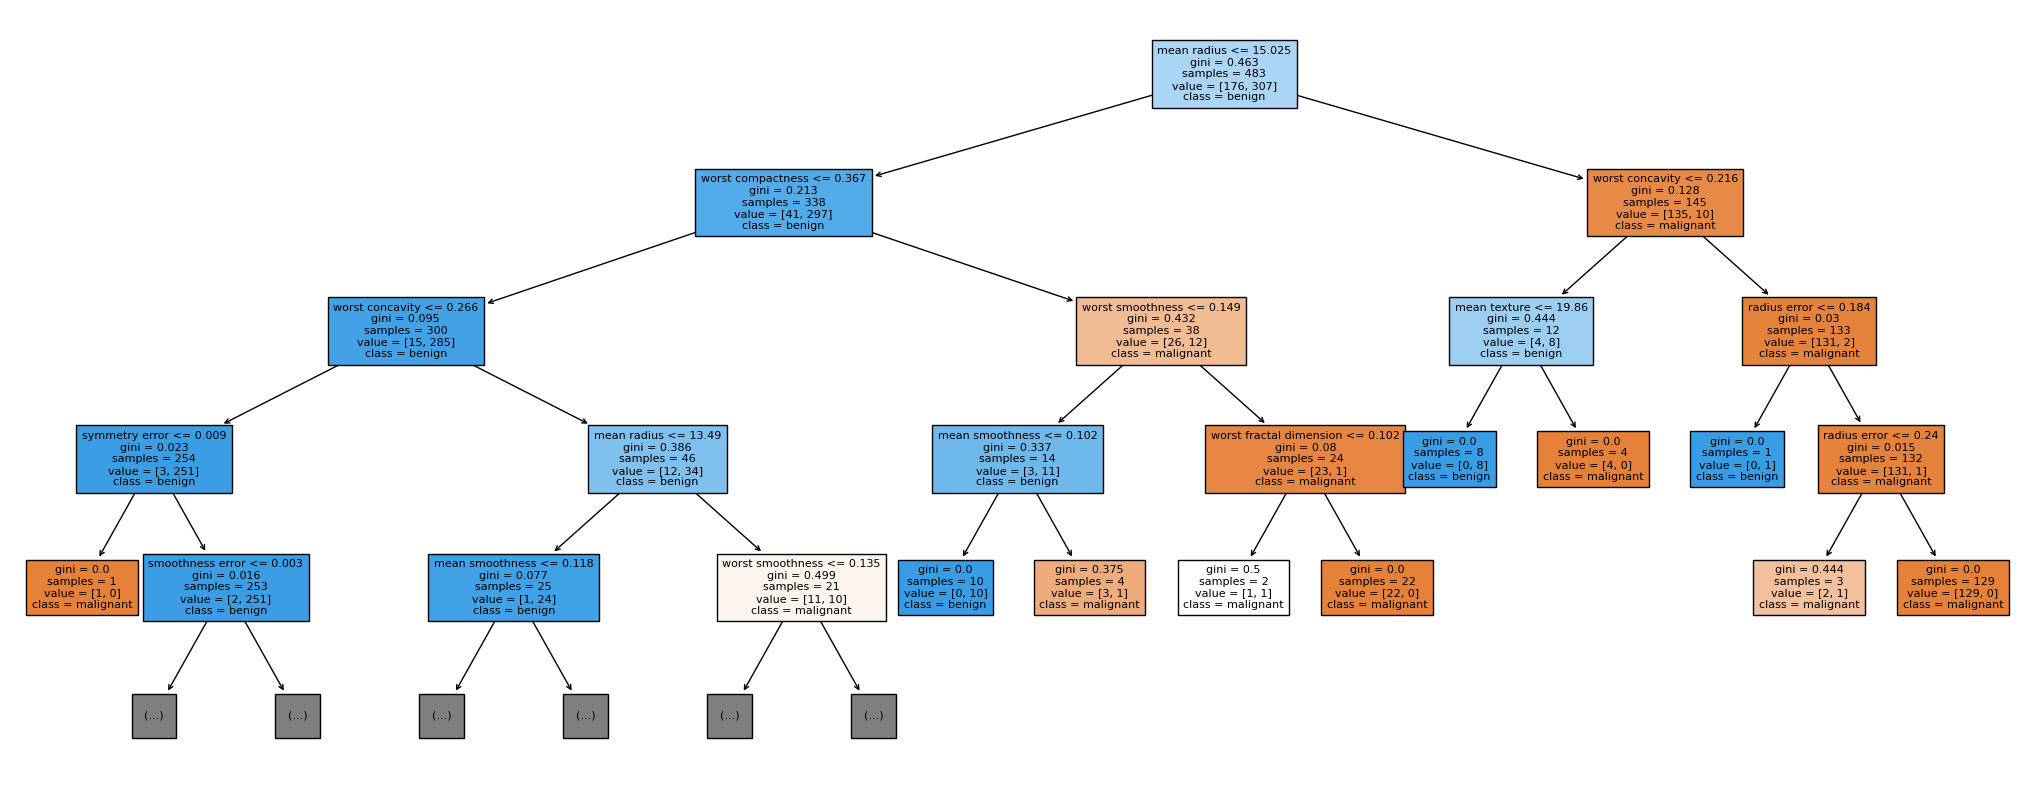

In [59]:
# Display the decision tree built from the training process (limited to max_depth=3)
plt.figure(figsize=(26, 10))
plot_tree(dt_clf_sampleSplit5, max_depth=4, filled=True, feature_names=df_feature_dropped.columns, class_names=target_names,fontsize=8)
plt.show()

In [57]:
# Train the decision tree classifier
dt_clf_sampleLeaf5 = DecisionTreeClassifier(min_samples_leaf=5, random_state=123)
dt_clf_sampleLeaf5.fit(X_train, y_train)

# Perform predictions on the training set and the test set
y_train_pred_sampleLeaf5 = dt_clf_sampleLeaf5.predict(X_train)
y_test_pred_sampleLeaf5 = dt_clf_sampleLeaf5.predict(X_test)

# Compare the accuracy scores for the two sets
train_accuracy_sampleLeaf5 = accuracy_score(y_train, y_train_pred_sampleLeaf5)
test_accuracy_sampleLeaf5 = accuracy_score(y_test, y_test_pred_sampleLeaf5)
tree_depth_sampleLeaf5 = dt_clf_sampleLeaf5.get_depth()

print("Training set accuracy:", train_accuracy_sampleLeaf5)
print("Test set accuracy:", test_accuracy_sampleLeaf5)
print("The depth of the tree is:", tree_depth_sampleLeaf5)

Training set accuracy: 0.9772256728778468
Test set accuracy: 0.8837209302325582
The depth of the tree is: 6


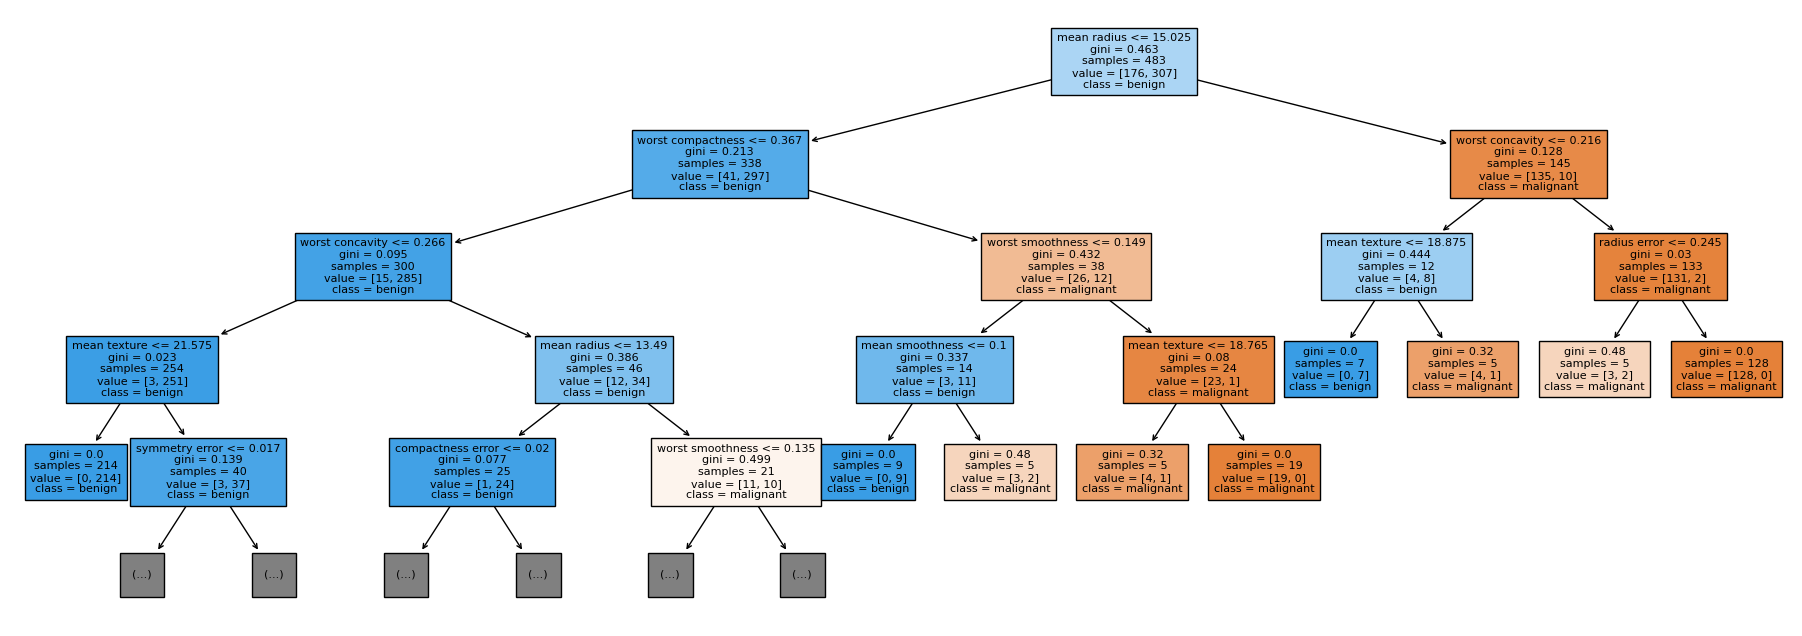

In [65]:
# Display the decision tree built from the training process (limited to max_depth=3)
plt.figure(figsize=(23, 8))
plot_tree(dt_clf_sampleLeaf5, max_depth=4, filled=True, feature_names=df_feature_dropped.columns, class_names=target_names,fontsize=8)
plt.show()

# Section 2: Concrete Slump Test

# Section 3: Abalone dataset